# Future Price Time Series Model Wards 1 & 2

In [1]:
# ResidentialSalesWithLocation_CSV

setwd("D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report")  #set my working directory
getwd()

HOUSE.df <- read.csv("ResidentialSalesWithLocation_CSV.csv", header = TRUE)  #import data into R

######################### Verify the data ##########################
head(HOUSE.df)   #Verify the first five rows of the dataframe

tail(HOUSE.df)   #Verify the last five rows of the dataframe

summary(HOUSE.df)   #To check the variables and counts

str(HOUSE.df)   #To check the data structure of the loaded dataset
####################################################################

[1] "D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report"

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,0150 0275,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407639,Old City 2,Ward 1,38.91745,-77.04023,5
2,0150 0276,1,0,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407640,Old City 2,Ward 1,38.91745,-77.04017,1
3,0150 0277,1,0,13,Hot Water Rad,N,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407641,Old City 2,Ward 1,38.91745,-77.04012,1
4,0150 0278,2,1,7,Warm Cool,Y,1,6,2,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407642,Old City 2,Ward 1,38.91745,-77.04006,5
5,0150 0279,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407643,Old City 2,Ward 1,38.91745,-77.04000,1
6,0150 0280,1,1,7,Warm Cool,Y,1,6,3,1910,⋯,1,11,960,2022/08/31 05:17:11+00,74407644,Old City 2,Ward 1,38.91745,-77.03995,1


,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
108398,PAR 01550236,2,0,13,Hot Water Rad,N,1,6,2,1934,⋯,1,12,4571,2022/08/31 05:17:11+00,74624612,Woodridge,Ward 5,38.92890,-76.97456,1
108399,PAR 01550251,2,0,1,Forced Air,Y,1,6,3,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624613,Woodridge,Ward 5,38.92700,-76.97157,4
108400,PAR 01550252,1,0,13,Hot Water Rad,N,1,5,2,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624614,Woodridge,Ward 5,38.92706,-76.97145,1
108401,PAR 01550254,3,0,13,Hot Water Rad,N,1,5,3,1922,⋯,0,12,7829,2022/08/31 05:17:11+00,74624615,Woodridge,Ward 5,38.92790,-76.97388,2
108402,PAR 01550255,3,1,1,Forced Air,Y,1,10,4,1925,⋯,0,13,4001,2022/08/31 05:17:11+00,74624616,Woodridge,Ward 5,38.92924,-76.97320,4
108403,PAR 01550259,1,0,13,Hot Water Rad,N,1,6,3,1940,⋯,0,11,1399,2022/08/31 05:17:11+00,74624617,Woodridge,Ward 5,38.92924,-76.97465,1


     SSL                BATHRM         HF_BATHRM            HEAT      
 Length:108403      Min.   : 0.000   Min.   : 0.0000   Min.   : 0.00  
 Class :character   1st Qu.: 1.000   1st Qu.: 0.0000   1st Qu.: 1.00  
 Mode  :character   Median : 2.000   Median : 1.0000   Median : 7.00  
                    Mean   : 2.124   Mean   : 0.6298   Mean   : 7.27  
                    3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:13.00  
                    Max.   :30.000   Max.   :12.0000   Max.   :13.00  
                    NA's   :1371     NA's   :1371      NA's   :1371   
    HEAT_D               AC              NUM_UNITS          ROOMS        
 Length:108403      Length:108403      Min.   : 0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:  6.000  
 Mode  :character   Mode  :character   Median : 1.000   Median :  7.000  
                                       Mean   : 1.196   Mean   :  7.397  
                                       3rd Qu.: 1.000   3rd Qu

'data.frame':	108403 obs. of  44 variables:
 $ SSL              : chr  "0150    0275" "0150    0276" "0150    0277" "0150    0278" ...
 $ BATHRM           : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM        : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT             : int  7 7 13 7 7 7 7 7 7 7 ...
 $ HEAT_D           : chr  "Warm Cool" "Warm Cool" "Hot Water Rad" "Warm Cool" ...
 $ AC               : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS            : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM            : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB              : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ YR_RMDL          : int  2004 NA NA 2016 NA NA 2001 NA 2003 2015 ...
 $ EYB              : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE         : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE     

In [2]:
################################################################################
# Create a new data set for the total population
# Three features, "SALEDATE", "PRICE", and "Ward"

HOUSE_TS1.df <- subset(HOUSE.df, select = c(SALEDATE, PRICE, WARD))

head(HOUSE_TS1.df)     #Verify the first five rows of the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts

str(HOUSE_TS1.df)   #To check the data structure of the loaded dataset
################################################################################

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013/07/22 00:00:00+00,755000,Ward 1
2,1900/01/01 00:00:00+00,NA,Ward 1
3,1996/02/12 00:00:00+00,118000,Ward 1
4,2022/04/06 00:00:00+00,1110000,Ward 1
5,2017/03/24 00:00:00+00,0,Ward 1
6,2000/06/30 00:00:00+00,251000,Ward 1


   SALEDATE             PRICE              WARD          
 Length:108403      Min.   :       0   Length:108403     
 Class :character   1st Qu.:       0   Class :character  
 Mode  :character   Median :  294000   Mode  :character  
                    Mean   :  465255                     
                    3rd Qu.:  715000                     
                    Max.   :25100000                     
                    NA's   :14181                        

'data.frame':	108403 obs. of  3 variables:
 $ SALEDATE: chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE   : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...
 $ WARD    : chr  "Ward 1" "Ward 1" "Ward 1" "Ward 1" ...


In [3]:
################################################################################
# Remove 0s and NA's from the "PRICE" variable
HOUSE_TS1.df[HOUSE_TS1.df==0] <- NA     # Set all 0s to NA

HOUSE_TS1.df <- na.omit(HOUSE_TS1.df)     # Removes all NA's from the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts
################################################################################

   SALEDATE             PRICE              WARD          
 Length:62008       Min.   :       1   Length:62008      
 Class :character   1st Qu.:  300000   Class :character  
 Mode  :character   Median :  557985   Mode  :character  
                    Mean   :  706961                     
                    3rd Qu.:  894000                     
                    Max.   :25100000                     

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




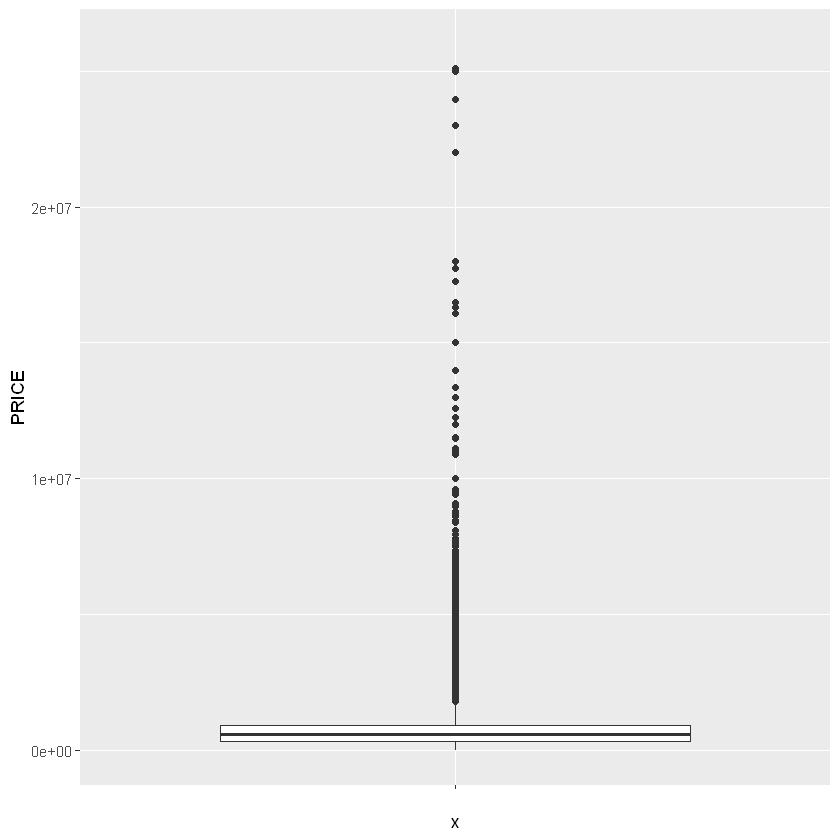

In [4]:
################################################################################
# Boxplot of the "PRICE" variable
# Install packages
install.packages("ggplot2")
install.packages("dplyr")
library("ggplot2")
library("dplyr")

# Create boxplot of the "PRICE" variable 
ggplot(data = HOUSE_TS1.df, aes(x = "", y = PRICE)) + 
  geom_boxplot() +
  coord_cartesian(ylim = c(0, 26000000)) # Set the y axis scale
################################################################################

In [5]:
################################################################################
# Install packages to work with dates
install.packages("lubridate")  # general package for handling and converting dates)
install.packages("linelist")   # has function to "guess" messy dates
install.packages("aweek")      # another option for converting dates to weeks, and weeks to dates
install.packages("zoo")        # additional date/time functions
install.packages("tidyverse")  # data management and visualization  
install.packages("rio")        # data import/export
library("lubridate")  
library("linelist")   
library("aweek")      
library("zoo")        
library("tidyverse")    
library("rio")   
################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'linelist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'aweek' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\zoo\libs\x64\zoo.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\zoo\libs\x64\zoo.dll: Permission denied"
Warning message:
"restored 'zoo'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [6]:
################################################################################
# Clean up Date attribute
class(HOUSE_TS1.df$SALEDATE)   #Check the class of the "SALEDATE" field

# Because "SALEDATE" is class 'character', we must convert it to class 'Date'
# Tell R how to identify the date parts of the "SALEDATE" field
# The format = argument specifies the date components and 
# drops the time component in the "SALEDATE'
HOUSE_TS1.df$SALEDATE <- as.Date(HOUSE_TS1.df$SALEDATE, format = "%Y/%m/%d")

head(HOUSE_TS1.df)   # Verify the time component was dropped

class(HOUSE_TS1.df$SALEDATE)   # Check the class of the "SALEDATE" field 

# Drop the 'day' from the date
HOUSE_TS2.df <- HOUSE_TS1.df
HOUSE_TS2.df$SALEDATE <- format(HOUSE_TS2.df$SALEDATE, format = "%Y-%m")

head(HOUSE_TS2.df)   # Verify the day component was dropped
################################################################################

[1] "character"

,SALEDATE,PRICE,WARD
,<date>,<int>,<chr>
1,2013-07-22,755000,Ward 1
3,1996-02-12,118000,Ward 1
4,2022-04-06,1110000,Ward 1
6,2000-06-30,251000,Ward 1
7,2021-11-22,930388,Ward 1
8,2006-02-06,606500,Ward 1


[1] "Date"

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013-07,755000,Ward 1
3,1996-02,118000,Ward 1
4,2022-04,1110000,Ward 1
6,2000-06,251000,Ward 1
7,2021-11,930388,Ward 1
8,2006-02,606500,Ward 1


In [7]:
################################################################################
# Filter database for only Wards 1 & 2

HOUSE_TS2.df <- subset(HOUSE_TS2.df, WARD %in% c("Ward 1", "Ward 2"))

summary(HOUSE_TS2.df)     #To check the variables and counts

str(HOUSE_TS2.df)   #To check the data structure

# Create a new data set for the Ward 1 &2 population
# Drop the Ward attribute and keep two features, "SALEDATE", "PRICE"

HOUSE_TS2.df <- subset(HOUSE_TS2.df, select = c(SALEDATE, PRICE))

head(HOUSE_TS2.df)     #Verify the first five rows of the dataframe

################################################################################

   SALEDATE             PRICE              WARD          
 Length:8834        Min.   :      10   Length:8834       
 Class :character   1st Qu.:  525000   Class :character  
 Mode  :character   Median :  850000   Mode  :character  
                    Mean   : 1064381                     
                    3rd Qu.: 1305750                     
                    Max.   :23960287                     

'data.frame':	8834 obs. of  3 variables:
 $ SALEDATE: chr  "2013-07" "1996-02" "2022-04" "2000-06" ...
 $ PRICE   : int  755000 118000 1110000 251000 930388 606500 162000 534000 450000 144330 ...
 $ WARD    : chr  "Ward 1" "Ward 1" "Ward 1" "Ward 1" ...


,SALEDATE,PRICE
,<chr>,<int>
1,2013-07,755000
3,1996-02,118000
4,2022-04,1110000
6,2000-06,251000
7,2021-11,930388
8,2006-02,606500


In [8]:
################################################################################
# Calculate the mean "Price" by "SALEDATE" (year and month)
HOUSE_TS3.df <- HOUSE_TS2.df
HOUSE_TS3.df <- aggregate(PRICE~SALEDATE,HOUSE_TS2.df,mean)

summary(HOUSE_TS2.df)   #To check the variables and counts before the aggregation

summary(HOUSE_TS3.df)   #To check the variables and counts after the aggregation

head(HOUSE_TS3.df, 20)

tail(HOUSE_TS3.df, 20)

# Filter the dataframe for only sales after 2010-01
HOUSE_TS4.df <- HOUSE_TS3.df
HOUSE_TS4.df <- HOUSE_TS4.df %>% filter(SALEDATE > '2010-01')

summary(HOUSE_TS4.df)   #To check the variables and counts

str(HOUSE_TS4.df)   #To check the data structure   
################################################################################

   SALEDATE             PRICE         
 Length:8834        Min.   :      10  
 Class :character   1st Qu.:  525000  
 Mode  :character   Median :  850000  
                    Mean   : 1064381  
                    3rd Qu.: 1305750  
                    Max.   :23960287  

   SALEDATE             PRICE        
 Length:372         Min.   :  40000  
 Class :character   1st Qu.: 344178  
 Mode  :character   Median : 819579  
                    Mean   : 814016  
                    3rd Qu.:1169484  
                    Max.   :5197017  

,SALEDATE,PRICE
,<chr>,<dbl>
1,1982-09,40000.0
2,1986-08,850000.0
3,1987-09,785000.0
4,1988-12,140000.0
5,1989-04,170000.0
6,1992-01,248000.0
7,1992-02,439000.0
8,1992-03,281250.0
9,1992-04,195187.5


,SALEDATE,PRICE
,<chr>,<dbl>
353,2021-01,1351195
354,2021-02,1395145
355,2021-03,1377357
356,2021-04,1472023
357,2021-05,1590834
358,2021-06,1544042
359,2021-07,1784210
360,2021-08,1388689
361,2021-09,1427664


   SALEDATE             PRICE        
 Length:151         Min.   : 622478  
 Class :character   1st Qu.:1030557  
 Mode  :character   Median :1237816  
                    Mean   :1228377  
                    3rd Qu.:1405975  
                    Max.   :3014658  

'data.frame':	151 obs. of  2 variables:
 $ SALEDATE: chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ PRICE   : num  937364 622478 880958 821779 1038461 ...


In [9]:
####################################################################
# Set time series (ts) for 'PRICE' variable

# Choose the 'PRICE' column and convert it to ts object

H_TS <- ts(HOUSE_TS4.df$PRICE, start=c(2010, 1), freq=12)

# Let us see the ts object

H_TS
#####################################################################


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,937363.8,622478.3,880957.5,821778.7,1038461.2,822895.0,818214.7,722745.0,941208.3,780605.0,1268591.8,633365.0
2011,1215506.7,1149833.3,856596.6,1001875.0,931678.1,1599607.3,1005022.0,1006434.8,698447.2,1050140.6,830536.5,1270964.3
2012,1055426.9,747875.0,757666.7,1061050.0,906798.5,952515.5,960605.8,975189.1,820942.9,954045.2,827055.2,1205521.1
2013,945681.2,1372688.9,989823.6,935366.7,1009004.3,997172.9,1069023.1,1505656.2,1132464.7,981152.9,1003263.9,971672.0
2014,1246770.6,809808.9,1783986.6,1299792.4,1120683.3,1237433.3,1242087.4,1070842.7,938898.4,1138764.8,1038180.5,1356115.0
2015,1557833.3,846089.7,1026998.0,1090629.7,1081828.6,1237816.4,1108746.8,1326704.4,1287924.2,1034116.7,1162288.7,1156785.3
2016,1320077.2,1263265.9,1171948.5,1179528.6,1247038.0,1119820.3,1617511.0,1122469.4,3014658.0,1073040.9,1063196.4,1580714.3
2017,1521562.8,1358221.4,1334279.0,1641611.2,1526580.6,1293665.3,1336431.2,1159671.9,1169708.0,1074381.5,1086597.2,1504971.2
2018,1422217.4,1336177.9,1456249.6,1330129.2,1311571.4,1169409.6,1455224.8,1128073.8,1091717.4,1381734.0,1362323.2,1448827.3
2019,1445021.7,1379568.9,1382325.9,1340958.8,1209596.4,1521672.4,1366103.8,1198410.0,1297376.2,1440324.5,1416097.7,1559496.4


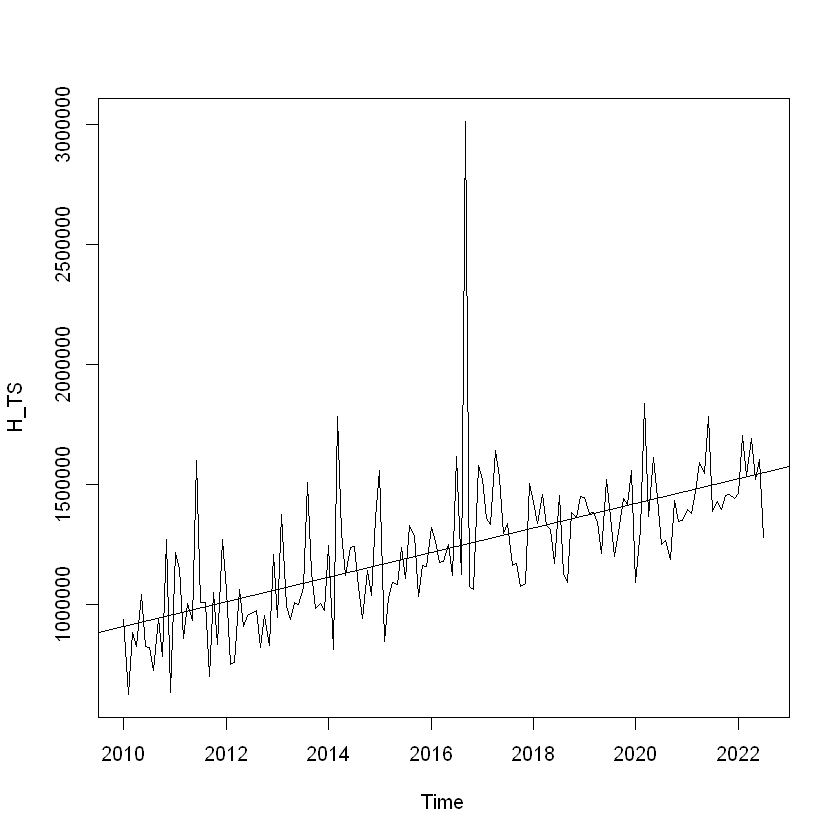

In [10]:
#####################################################################
# Let us fit a regression line on the dataset

plot(H_TS)

abline(reg=lm(H_TS~time(H_TS)))
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,7,8,9,10,11,12
2018,1,2,3,4,5,6,7,8,9,10,11,12
2019,1,2,3,4,5,6,7,8,9,10,11,12


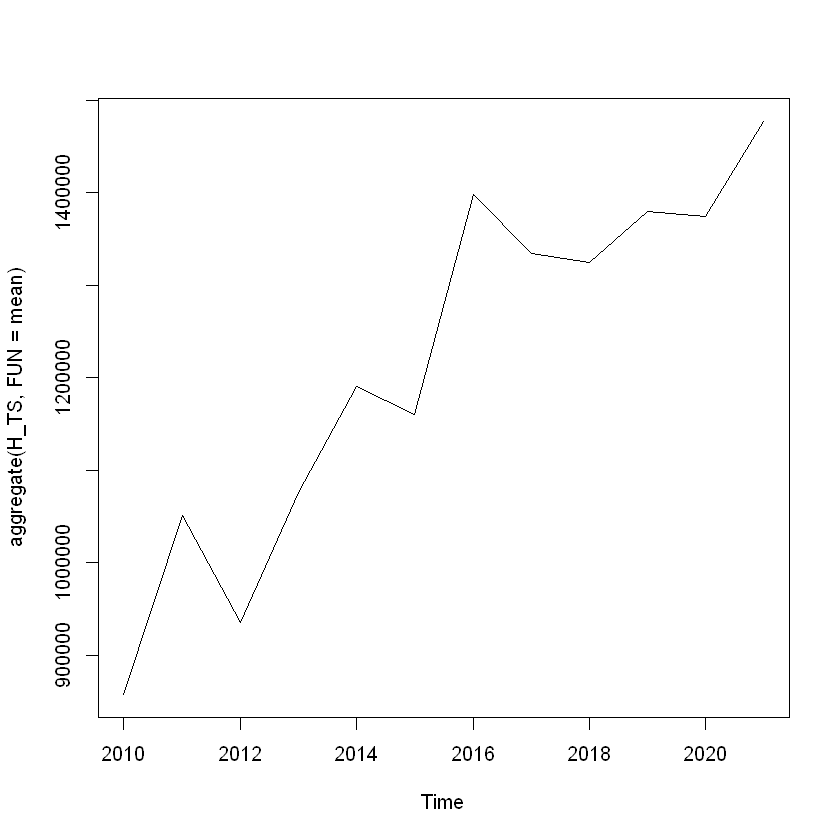

In [11]:
#####################################################################
# First let us plot the cycle and trend
# Aggregate the cycles and display a year-on-year trend

cycle(H_TS)

plot(aggregate(H_TS,FUN=mean))

#####################################################################


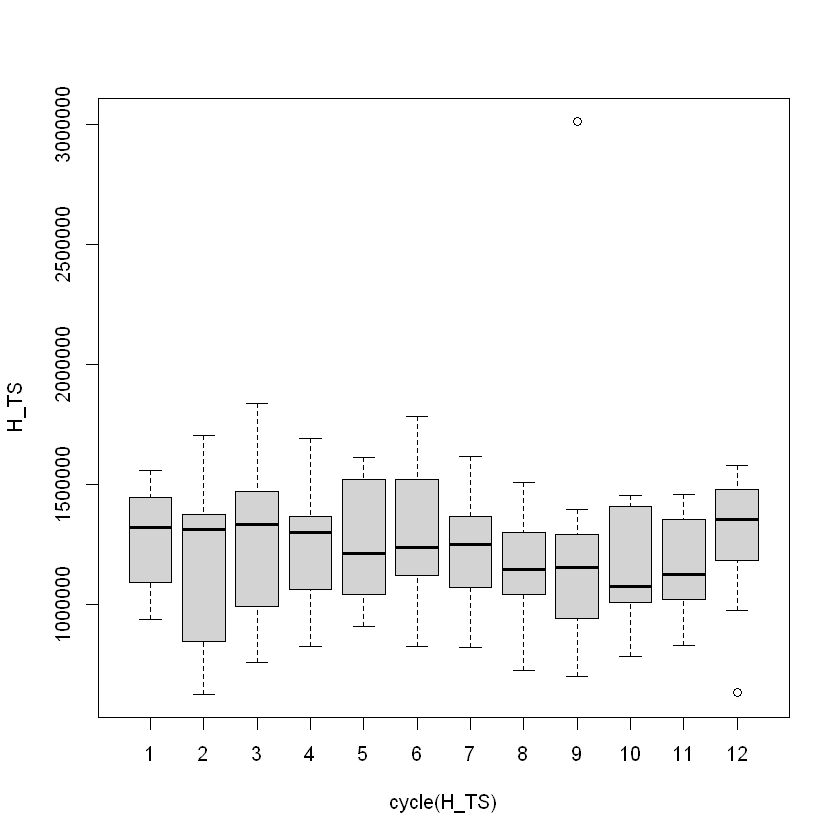

In [12]:
#####################################################################
# Letâ™s look in to the seasonal effects

boxplot(H_TS~cycle(H_TS))

#####################################################################

In [13]:
#####################################################################
# Since we want to remove the unequal variances in the data we will take the log of the series
# Before we fit the ARIMA model to our time series, we need to remove the unequal variances in 
# the data by taking the log of the series.

# Also, the original signal had trends and seasonal effects, so it was not stationary.  
# Therefore, we perform a diff of the signal and check if the trends and seasonal effect can be removed. 


library(tseries)

# Now perform the Augmented Dickey-Fuller Test

adf.test(diff(log(H_TS)), alternative="stationary", k=0)

# This will give you the result of the Augmented Dickey-Fuller Test
#####################################################################

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(diff(log(H_TS)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(log(H_TS))
Dickey-Fuller = -23.76, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


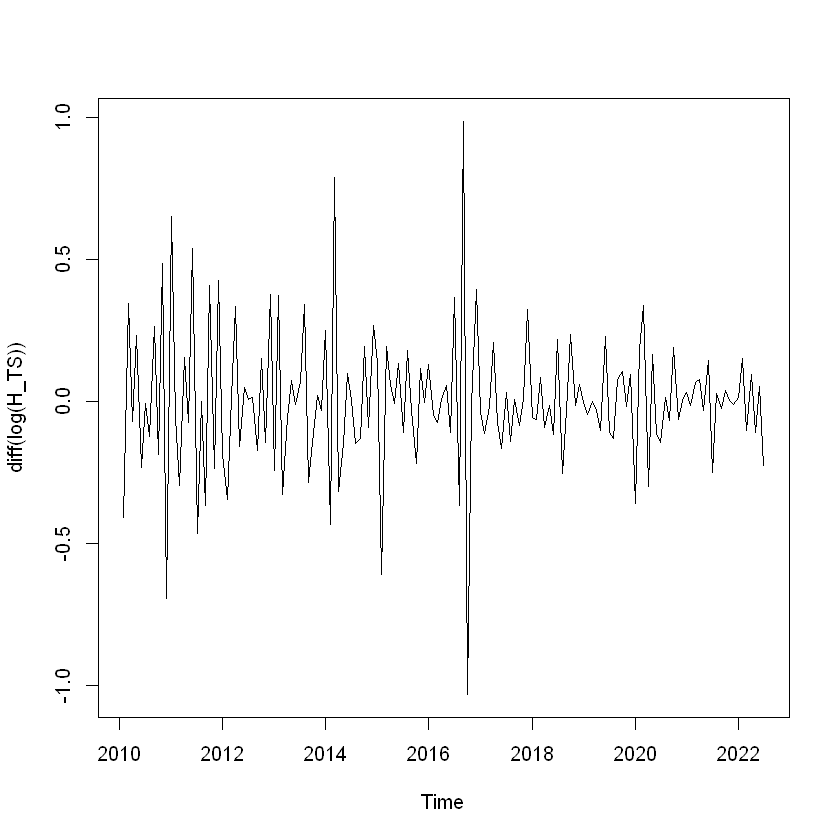

In [14]:
#####################################################################
# Let us now plot the series

plot(diff(log(H_TS)))

#####################################################################

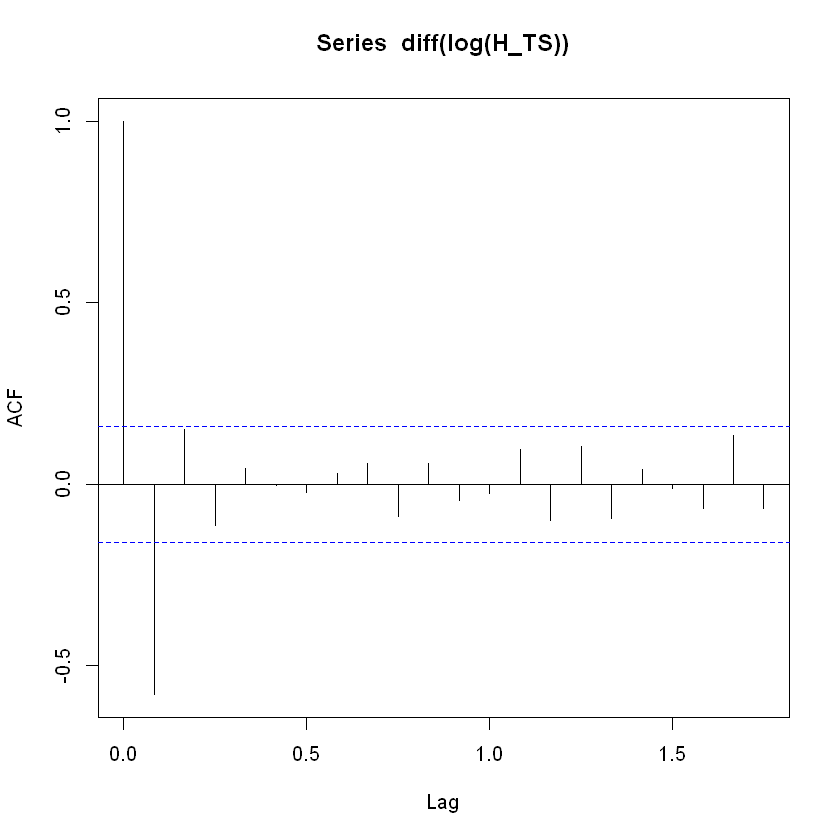

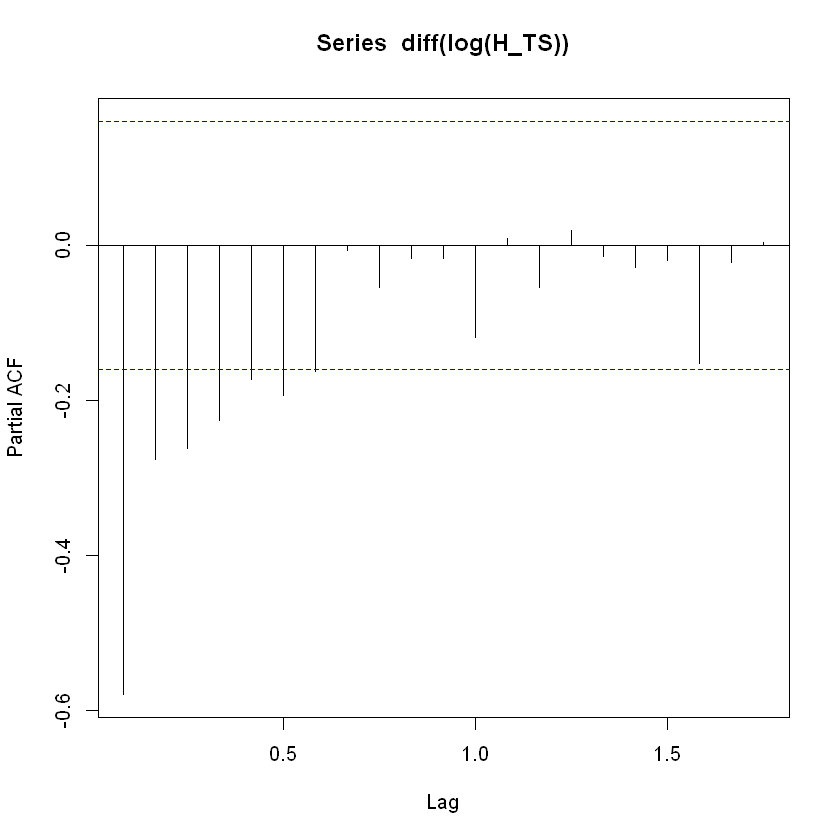

In [15]:
#####################################################################
# Now let us look into the ACF  and PACF charts

acf(diff(log(H_TS)))

pacf(diff(log(H_TS)))

# ARIMA (1,1,2)

#####################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\forecast\libs\x64\forecast.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\forecast\libs\x64\forecast.dll: Permission denied"
Warning message:
"restored 'forecast'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpyG9Zfu\downloaded_packages



Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
          ar1      ma1      ma2     sar1     sma1     sma2
      -0.6419  -0.4271  -0.4725  -0.7989  -0.1763  -0.8236
s.e.   0.3220   0.3564   0.3416   0.5300   0.5258   0.5199

sigma^2 estimated as 0.02898:  log likelihood = 31.9,  aic = -49.79

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.02496618,0.1627785,0.1148436,-0.1895303,0.8194899,0.6692835,-0.02032784



Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
          ar1      ma1      ma2     sar1     sma1     sma2
      -0.6419  -0.4271  -0.4725  -0.7989  -0.1763  -0.8236
s.e.   0.3220   0.3564   0.3416   0.5300   0.5258   0.5199

sigma^2 estimated as 0.02898:  log likelihood = 31.9,  aic = -49.79

Training set error measures:
                      ME      RMSE       MAE        MPE      MAPE      MASE
Training set -0.02496618 0.1627785 0.1148436 -0.1895303 0.8194899 0.6692835
                    ACF1
Training set -0.02032784


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(1,1,2)[12]
Q* = 22.154, df = 18, p-value = 0.2252

Model df: 6.   Total lags used: 24



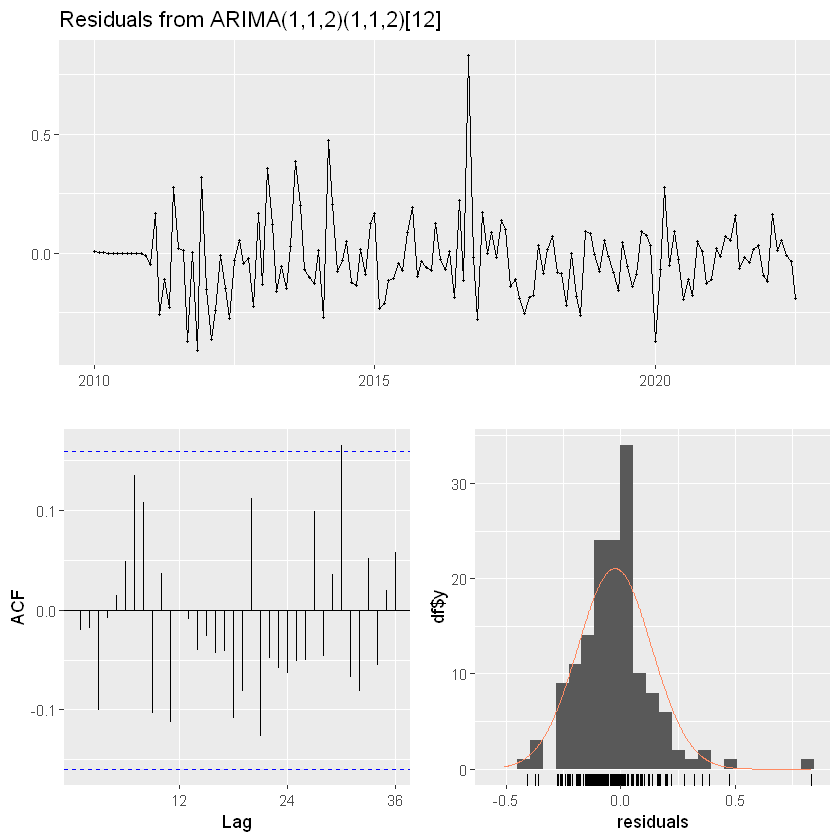

In [16]:
install.packages("forecast") 
library("forecast") 

#####################################################################
# Let us now fit the ARIMA(1,1,2)

(fit_open <- arima(log(H_TS), c(1, 1, 2),seasonal = list(order = c(1, 1, 2), period = 12)))

# Produce error measures
accuracy(fit_open)

# Examine the AIC
summary(fit_open)

# Examine the Residuals
checkresiduals(fit_open) 

#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,765819.4,801543.0,890744.0,930399.0,875616.5,795517.4,801228.3,846441.7,942752.5,987788.4,937707.1
2011,1053552.9,1092942.5,966225.4,948006.2,1116209.6,1283978.7,1154021.5,929084.7,863367.4,907316.2,995544.5,1106973.0
2012,1032423.3,827210.9,831064.6,946641.3,956790.6,943108.8,962229.1,932981.7,892780.0,889022.1,953419.1,1045944.6
2013,1117393.1,1170220.7,1071925.7,967390.3,987637.0,1018093.3,1160218.9,1303200.1,1187934.6,1024508.6,989838.2,1048344.6
2014,1068755.5,1162593.8,1419393.6,1376063.7,1194648.1,1209409.3,1198112.7,1080667.8,1021851.1,1063652.1,1142810.2,1327061.0
2015,1329467.8,1069252.7,997678.8,1072521.5,1123025.8,1166552.0,1195503.6,1262519.9,1234167.4,1129611.6,1128869.8,1198984.1
2016,1265051.4,1254639.4,1196672.9,1194510.9,1198356.2,1276047.4,1369328.0,1719277.0,2056206.6,1555984.1,1195037.0,1436546.9
2017,1495515.3,1393071.1,1417097.6,1536020.5,1497109.4,1362585.6,1281549.9,1206370.7,1143367.3,1101267.0,1188136.8,1379689.2
2018,1421396.0,1387705.7,1394701.6,1357019.8,1280670.4,1276403.9,1301983.3,1200772.4,1173310.6,1304377.2,1388801.9,1426249.9
2019,1429609.9,1396621.4,1371294.9,1318460.0,1320456.0,1404761.3,1363072.5,1265075.0,1308371.7,1398530.7,1458004.1,1406455.0


Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"


         Point Forecast     Lo 80   Hi 80       Lo 95   Hi 95
Jul 2022        1515583 1353684.8 1677481 1267981.196 1763184
Aug 2022        1529370 1298972.2 1759768 1177007.081 1881733
Sep 2022        1543157 1259201.7 1827112 1108884.913 1977429
Oct 2022        1556944 1227000.7 1886887 1052339.248 2061549
Nov 2022        1570731 1199532.5 1941930 1003031.826 2138431
Dec 2022        1584518 1175351.7 1993685  958751.925 2210285
Jan 2023        1598305 1153604.8 2043006  918194.464 2278416
Feb 2023        1612092 1133739.2 2090446  880514.328 2343671
Mar 2023        1625880 1115373.6 2136386  845128.053 2406631
Apr 2023        1639667 1098231.7 2181102  811613.366 2467720
May 2023        1653454 1082106.4 2224801  779653.369 2527254
Jun 2023        1667241 1066837.6 2267644  749003.307 2585478
Jul 2023        1681028 1052298.8 2309757  719469.666 2642586
Aug 2023        1694815 1038388.0 2351242  690896.444 2698734
Sep 2023        1708602 1025021.5 2392183  663155.801 2754049
Oct 2023

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-9133.742,108768.7,77268.68,-1.102062,6.35563,0.5268228,0.2349564



	Ljung-Box test

data:  Residuals from ETS(M,A,N)
Q* = 79.957, df = 20, p-value = 3.993e-09

Model df: 4.   Total lags used: 24




Forecast method: ETS(M,A,N)

Model Information:
ETS(M,A,N) 

Call:
 ets(y = object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 796938.7279 
    b = 13923.4812 

  sigma:  0.0834

     AIC     AICc      BIC 
4186.740 4187.159 4201.759 

Error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set -9133.742 108768.7 77268.68 -1.102062 6.35563 0.5268228 0.2349564

Forecasts:
         Point Forecast     Lo 80   Hi 80       Lo 95   Hi 95
Jul 2022        1515583 1353684.8 1677481 1267981.196 1763184
Aug 2022        1529370 1298972.2 1759768 1177007.081 1881733
Sep 2022        1543157 1259201.7 1827112 1108884.913 1977429
Oct 2022        1556944 1227000.7 1886887 1052339.248 2061549
Nov 2022        1570731 1199532.5 1941930 1003031.826 2138431
Dec 2022        1584518 1175351.7 1993685  958751.925 2210285
J

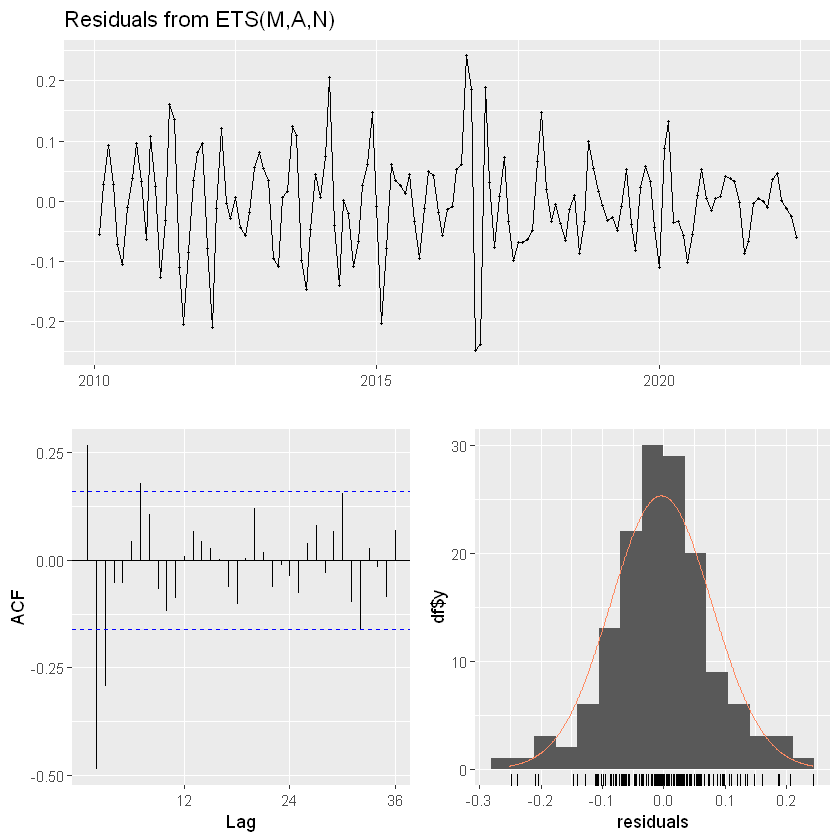

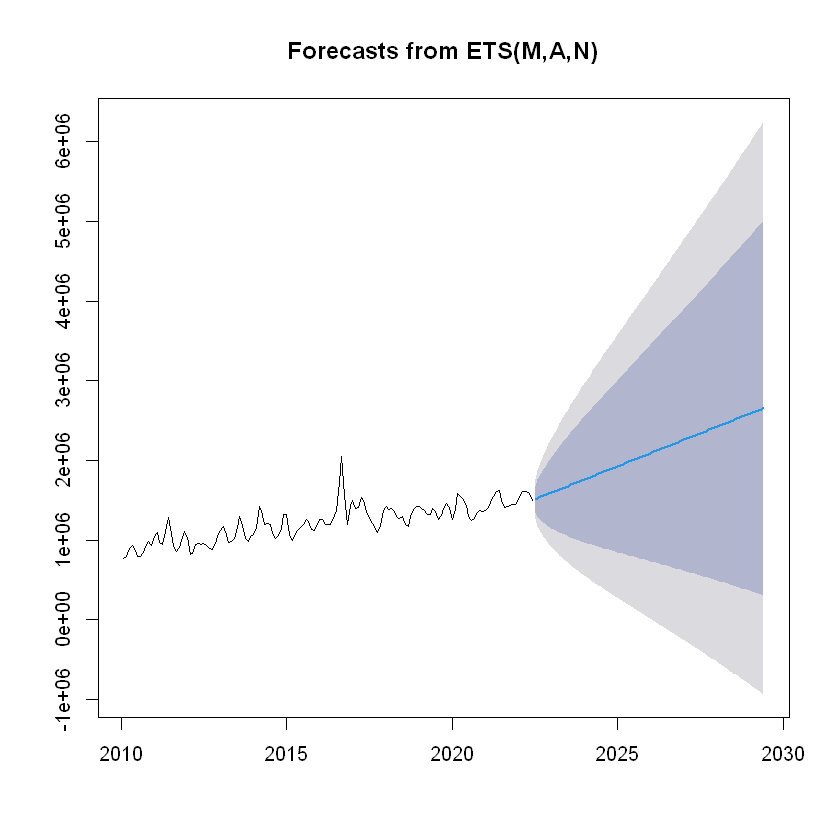

In [17]:
################################################################################
# Using Simple Moving Average
# forecasting model using SMA

SMA_fit <- ma(H_TS, order = 2)
SMA_fit

SMA_fit_pred <- forecast(SMA_fit, h=84)
SMA_fit_pred

# Examine model accuracy
accuracy(SMA_fit_pred)

# Examine the Residuals
checkresiduals(SMA_fit_pred) 

# Examine the AIC
summary(SMA_fit_pred)

plot(SMA_fit_pred)

################################################################################

In [18]:
#####################################################################
# Now let us do some prediction for the next 7 years

# Monthly Average Sale Price
pred_H_TS <- predict(fit_open, n.ahead = 7*12)

pred_H_TS

pred_H_TS$pred2 <- 2.71828^(pred_H_TS$pred)

pred_H_TS


# Calculate mean and standard deviation of the prediction
Avg.vF <- mean(pred_H_TS$pred2)
Avg.vF

StandD <- sd(pred_H_TS$pred2)
StandD

################################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,14.23942,14.20544,14.20652,14.19740,14.30519
2023,14.32215,14.22478,14.30852,14.30806,14.29563,14.32410,14.28411,14.25040,14.27361,14.24414,14.24932,14.34797
2024,14.38417,14.26893,14.34287,14.35490,14.33925,14.38484,14.33453,14.30336,14.31597,14.28839,14.29660,14.39327
2025,14.42005,14.31527,14.39949,14.39997,14.38790,14.41916,14.37752,14.34405,14.36531,14.33610,14.34196,14.44017
2026,14.47450,14.36135,14.43737,14.44707,14.43214,14.47485,14.42628,14.39465,14.40900,14.38109,14.38883,14.48581
2027,14.51411,14.40764,14.49022,14.49255,14.47990,14.51347,14.47043,14.43733,14.45720,14.42825,14.43449,14.53245
2028,14.56557,14.45376,14.53110,14.53932,14.52485,14.56572,14.51826,14.48634,14.50180,14.47368,14.48112,14.57829
2029,14.60756,14.50002,14.58154,14.58506,14.57205,14.60708,14.56316,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1772860,0.1776835,0.1795294,0.1795334,0.1803058


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,14.23942,14.20544,14.20652,14.19740,14.30519
2023,14.32215,14.22478,14.30852,14.30806,14.29563,14.32410,14.28411,14.25040,14.27361,14.24414,14.24932,14.34797
2024,14.38417,14.26893,14.34287,14.35490,14.33925,14.38484,14.33453,14.30336,14.31597,14.28839,14.29660,14.39327
2025,14.42005,14.31527,14.39949,14.39997,14.38790,14.41916,14.37752,14.34405,14.36531,14.33610,14.34196,14.44017
2026,14.47450,14.36135,14.43737,14.44707,14.43214,14.47485,14.42628,14.39465,14.40900,14.38109,14.38883,14.48581
2027,14.51411,14.40764,14.49022,14.49255,14.47990,14.51347,14.47043,14.43733,14.45720,14.42825,14.43449,14.53245
2028,14.56557,14.45376,14.53110,14.53932,14.52485,14.56572,14.51826,14.48634,14.50180,14.47368,14.48112,14.57829
2029,14.60756,14.50002,14.58154,14.58506,14.57205,14.60708,14.56316,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1772860,0.1776835,0.1795294,0.1795334,0.1803058


[1] 1815714

[1] 191132.8

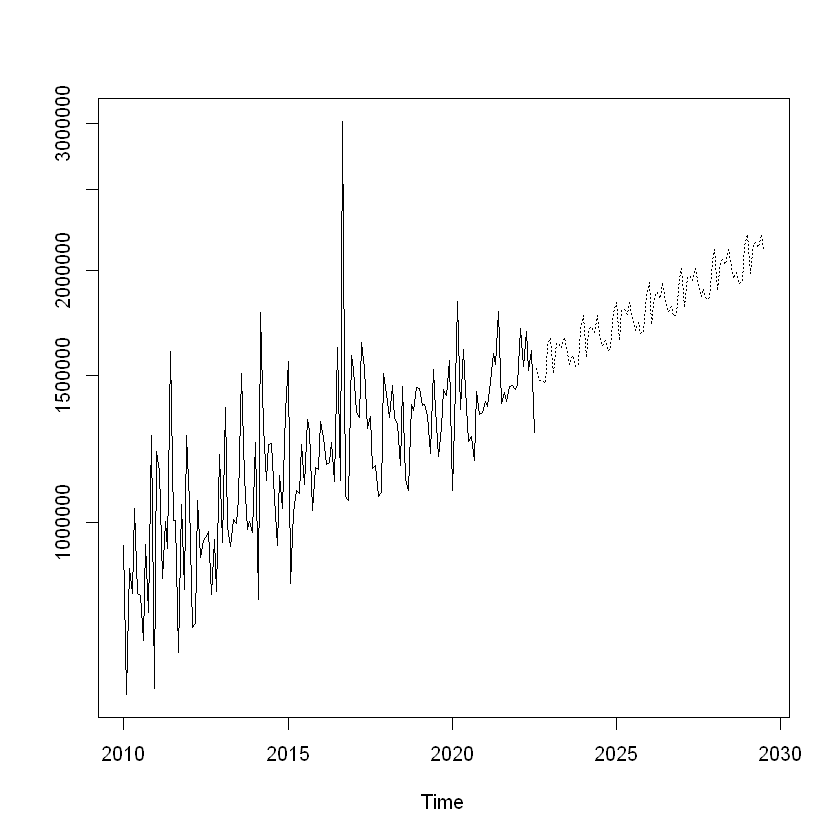

In [19]:
################################################################################

ts.plot(H_TS,2.71828^pred_H_TS$pred, log = "y", lty = c(1,3))

################################################################################

         Point Forecast   Lo 80   Hi 80     Lo 95   Hi 95
Aug 2022        1537011 1227889 1846132 1064250.4 2009771
Sep 2022        1498304 1189182 1807427 1025542.1 1971067
Oct 2022        1527964 1215611 1840318 1050260.6 2005668
Nov 2022        1516760 1203665 1829855 1037922.6 1995598
Dec 2022        1521764 1206986 1836543 1040351.6 2003177
Jan 2023        1507436 1191147 1823726 1023713.3 1991159
Feb 2023        1511065 1191394 1830735 1022171.0 1999959
Mar 2023        1509700 1187320 1832080 1016662.1 2002738
Apr 2023        1511391 1186211 1836571 1014070.7 2008711
May 2023        1511457 1183738 1839177 1010254.1 2012661
Jun 2023        1512024 1181806 1842241 1006999.1 2017048
Jul 2023        1511654 1179016 1844293 1002928.2 2020381
Aug 2023        1511656 1176559 1846753  999169.6 2024142
Sep 2023        1511526 1173985 1849066  995302.0 2027749
Oct 2023        1511544 1171562 1851526  991586.2 2031502
Nov 2023        1511540 1169137 1853943  987879.5 2035200
Dec 2023      

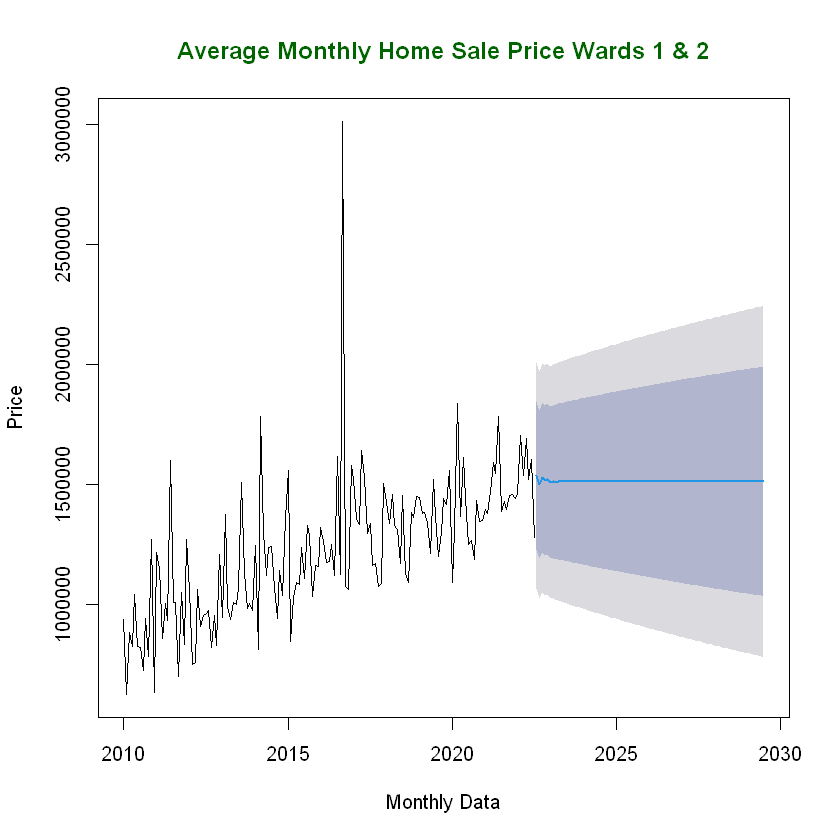

In [20]:
################################Using auto.arima################################
################################################################################

# forecasting model using arima model
fit <- auto.arima(H_TS)

# Next 84 forecasted values
forecast(fit, 84)

# plotting the graph with next
# 84 monthly forecasted values
plot(forecast(fit, 84), xlab ="Monthly Data",
     ylab ="Price",
     main ="Average Monthly Home Sale Price Wards 1 & 2", col.main ="darkgreen")

################################################################################

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,33454.51,235551.4,148806.3,0.1335584,11.87334,0.6821487,-0.02967671


Series: H_TS 
ARIMA(5,1,1) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ma1
      -0.1863  -0.0436  -0.0923  -0.0644  -0.0530  -0.8109
s.e.   0.1419   0.1388   0.1220   0.1151   0.1021   0.1192

sigma^2 = 5.818e+10:  log likelihood = -2069.61
AIC=4153.22   AICc=4154.01   BIC=4174.29

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 33454.51 235551.4 148806.3 0.1335584 11.87334 0.6821487
                    ACF1
Training set -0.02967671


	Ljung-Box test

data:  Residuals from ARIMA(5,1,1)
Q* = 14.525, df = 18, p-value = 0.6943

Model df: 6.   Total lags used: 24



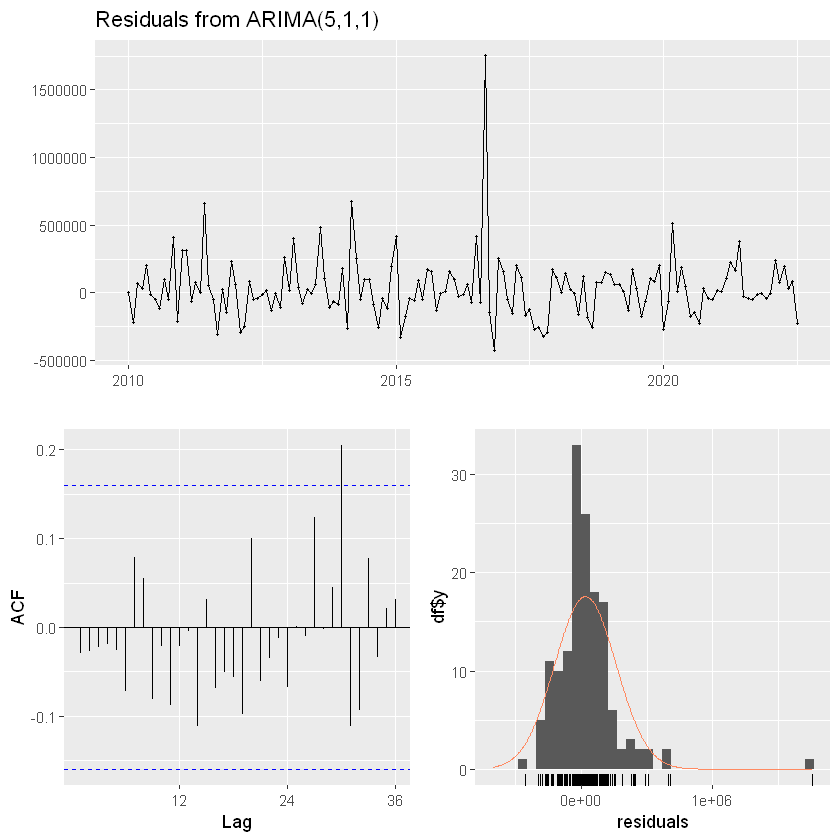

In [21]:
#####################################################################

# Produce error measures
accuracy(fit)

# Examine the AIC
summary(fit)

# Examine the Residuals
checkresiduals(fit) 

#####################################################################

In [22]:
#####################################################################
# Manipulate the Predicted Output into a Dataframe
pred_H_TS$pred2

# Converting to data frame
H_TS_DF <- as.data.frame(pred_H_TS$pred2)

H_TS_DF

# Changing the sales column name
colnames(H_TS_DF)[1] <- "Average Home Sale Price"

H_TS_DF

# Creating the 84 dates
Date <- seq(as.Date("2022/8/1"), by = "month", length.out = 84)
Date

# Adding the dates to the dataframe
H_TS_DF$Date <- Date

H_TS_DF

# Deleting the first column
# H_TS_DF_F <- H_TS_DF[-c(1)]
# H_TS_DF_F

# Re-order the columns
H_TS_DF_F <- H_TS_DF[, c(2, 1)]
H_TS_DF_F

# Generate output value based on date
OutP <- H_TS_DF_F[H_TS_DF_F$Date == '2022-12-01', ]
OutP
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,1527908,1476857,1478458,1465039,1631777
2023,1659685,1505696,1637223,1636469,1616248,1662920,1597743,1544771,1581058,1535133,1543103,1703096
2024,1765873,1573675,1694434,1714946,1688317,1767071,1680358,1628799,1649463,1604586,1617820,1782025
2025,1830398,1648304,1793152,1794005,1772483,1828769,1754175,1696434,1732881,1683001,1692891,1867585
2026,1932820,1726040,1862363,1880519,1852661,1933497,1841829,1784486,1810272,1760445,1774124,1954798
2027,2010912,1807817,1963438,1968019,1943294,2009623,1924970,1862296,1899665,1845465,1857012,2048136
2028,2117109,1893154,2045372,2062255,2032637,2117429,2019286,1955839,1986304,1931230,1945649,2144213
2029,2207903,1982783,2151197,2158772,2130869,2206839,2112000,,,,,


x
<ts>
1527908
1476857
1478458
1465039
1631777
1659685
1505696
1637223
1636469


Average Home Sale Price
<ts>
1527908
1476857
1478458
1465039
1631777
1659685
1505696
1637223
1636469


[1] "2022-08-01" "2022-09-01" "2022-10-01" "2022-11-01" "2022-12-01"
 [6] "2023-01-01" "2023-02-01" "2023-03-01" "2023-04-01" "2023-05-01"
[11] "2023-06-01" "2023-07-01" "2023-08-01" "2023-09-01" "2023-10-01"
[16] "2023-11-01" "2023-12-01" "2024-01-01" "2024-02-01" "2024-03-01"
[21] "2024-04-01" "2024-05-01" "2024-06-01" "2024-07-01" "2024-08-01"
[26] "2024-09-01" "2024-10-01" "2024-11-01" "2024-12-01" "2025-01-01"
[31] "2025-02-01" "2025-03-01" "2025-04-01" "2025-05-01" "2025-06-01"
[36] "2025-07-01" "2025-08-01" "2025-09-01" "2025-10-01" "2025-11-01"
[41] "2025-12-01" "2026-01-01" "2026-02-01" "2026-03-01" "2026-04-01"
[46] "2026-05-01" "2026-06-01" "2026-07-01" "2026-08-01" "2026-09-01"
[51] "2026-10-01" "2026-11-01" "2026-12-01" "2027-01-01" "2027-02-01"
[56] "2027-03-01" "2027-04-01" "2027-05-01" "2027-06-01" "2027-07-01"
[61] "2027-08-01" "2027-09-01" "2027-10-01" "2027-11-01" "2027-12-01"
[66] "2028-01-01" "2028-02-01" "2028-03-01" "2028-04-01" "2028-05-01"
[71] "2028-06-01" "2028-07-01" "2028-08-01" "2028-09-01" "2028-10-01"
[76] "2028-11-01" "2028-12-01" "2029-01-01" "2029-02-01" "2029-03-01"
[81] "2029-04-01" "2029-05-01" "2029-06-01" "2029-07-01"

Average Home Sale Price,Date
<ts>,<date>
1527908,2022-08-01
1476857,2022-09-01
1478458,2022-10-01
1465039,2022-11-01
1631777,2022-12-01
1659685,2023-01-01
1505696,2023-02-01
1637223,2023-03-01
1636469,2023-04-01


Date,Average Home Sale Price
<date>,<ts>
2022-08-01,1527908
2022-09-01,1476857
2022-10-01,1478458
2022-11-01,1465039
2022-12-01,1631777
2023-01-01,1659685
2023-02-01,1505696
2023-03-01,1637223
2023-04-01,1636469


,Date,Average Home Sale Price
,<date>,<dbl>
5,2022-12-01,1631777
